In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
% matplotlib inline

In [38]:
numbers = [5,1,2,3,4,5]
total = 0
for num in range(numbers[0]):
    total += numbers[num+1]
    print total
print total

1
3
6
10
15
15


In [2]:
df = pd.read_csv('data/train.csv.zip')
df.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


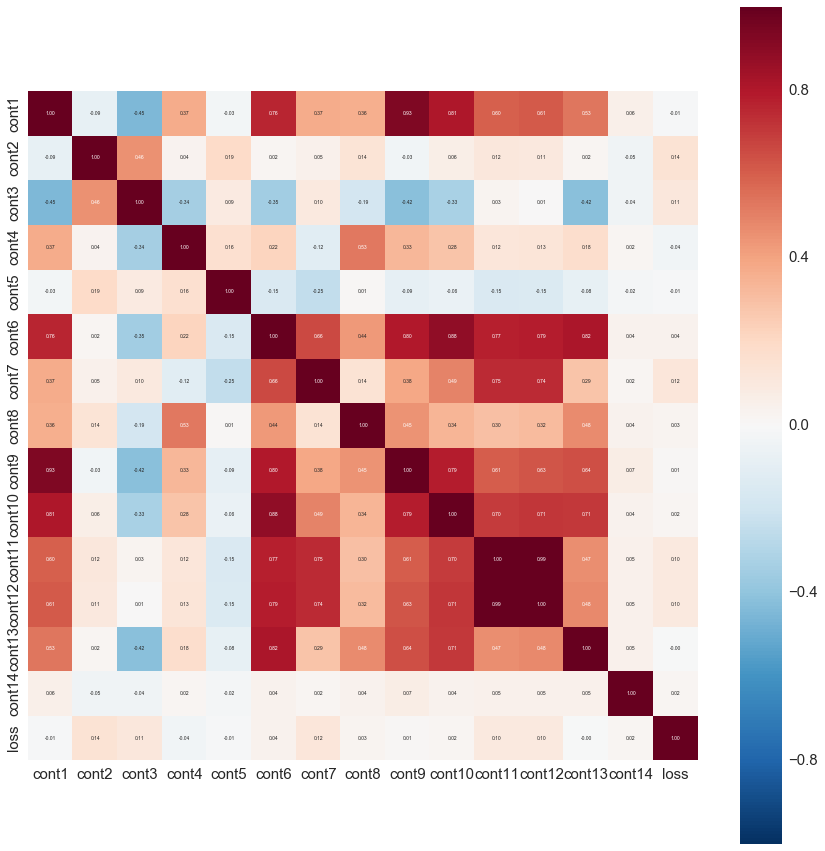

In [34]:
cols = list(df.columns[-15:])
cm = np.corrcoef(df[cols].values.T)
plt.figure(figsize=(15,15))
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size':5},
                 yticklabels=cols,
                 xticklabels=cols)
plt.show()

In [3]:
df[df.cat19=='B'].loss.mean()

4072.0911117256674

In [32]:
df.columns[-15:]

Index([u'cont1', u'cont2', u'cont3', u'cont4', u'cont5', u'cont6', u'cont7',
       u'cont8', u'cont9', u'cont10', u'cont11', u'cont12', u'cont13',
       u'cont14', u'loss'],
      dtype='object')

In [6]:
from math import sqrt
def CohenEffectSize(group1,group2):
    diff = abs(group1.mean() - group2.mean())
    var1, var2 = group1.var(),group2.var()
    n1, n2 = len(group1), len(group2)
    pooled_var = (n1*var1 + n2*var2)/(n1+n2)
    d = diff/sqrt(pooled_var)
    return d    

In [28]:
for i in range(1,73):
    group1 = df[df['cat{}'.format(i)]=='A'].loss
    group2 = df[df['cat{}'.format(i)]=='B'].loss
    d = CohenEffectSize(group1,group2)
    if d < 0.2:
        print 'SMALL ==> cat{} | d={}'.format(i,d)
    elif d > 0.8:
        print 'LARGE ==> cat{} | d={}'.format(i,d)        
        

LARGE ==> cat3 | d=0.864891977738
LARGE ==> cat7 | d=1.89618840506
LARGE ==> cat10 | d=0.825395544668
LARGE ==> cat12 | d=0.91341827625
LARGE ==> cat14 | d=0.945628535296
SMALL ==> cat15 | d=0.133990554796
LARGE ==> cat16 | d=1.06832510567
LARGE ==> cat17 | d=0.949183875689
LARGE ==> cat20 | d=0.952731278095
SMALL ==> cat21 | d=0.13749638646
SMALL ==> cat27 | d=0.0300049104631
SMALL ==> cat31 | d=0.0756446943794
SMALL ==> cat37 | d=0.0338703340429
SMALL ==> cat39 | d=0.101401863903
SMALL ==> cat44 | d=0.174239660301
SMALL ==> cat49 | d=0.119705243102
SMALL ==> cat52 | d=0.15113295985
SMALL ==> cat53 | d=0.178486076375
SMALL ==> cat54 | d=0.0557488286747
LARGE ==> cat57 | d=2.65741576657
LARGE ==> cat58 | d=1.04457660513
LARGE ==> cat59 | d=1.06900426242
LARGE ==> cat62 | d=0.946441810851
LARGE ==> cat64 | d=1.36584814527
SMALL ==> cat70 | d=0.028926119978


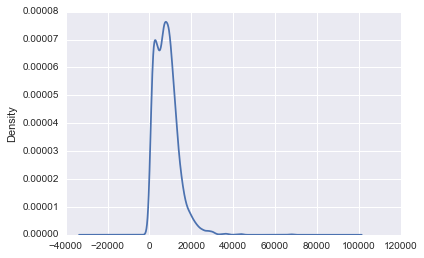

In [18]:
df[df.cat7=='B'].loss.plot(kind='kde')

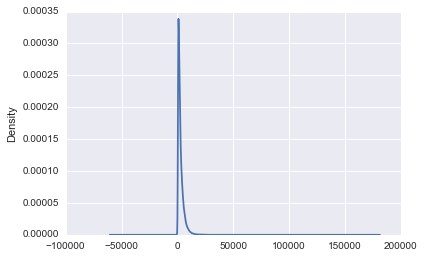

In [19]:
df[df.cat7=='A'].loss.plot(kind='kde')

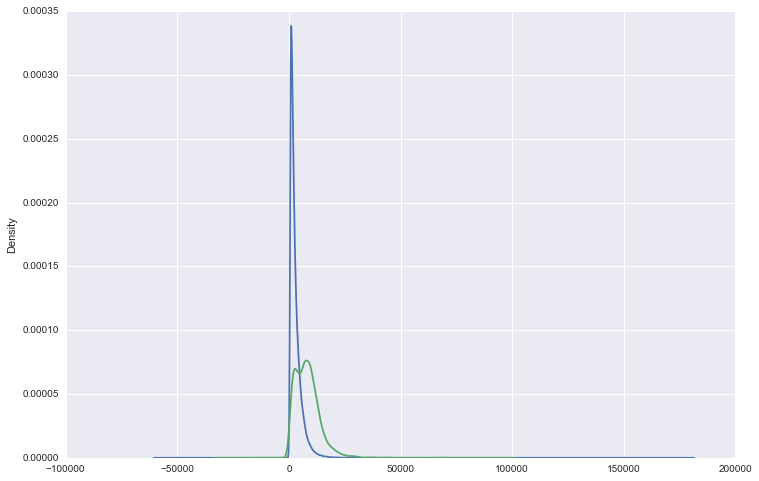

In [21]:
fg,ax = plt.subplots(nrows=1,ncols=1,sharey=True,sharex=True,figsize=(12, 8))
df[df.cat7=='A'].loss.plot(kind='kde')
df[df.cat7=='B'].loss.plot(kind='kde')

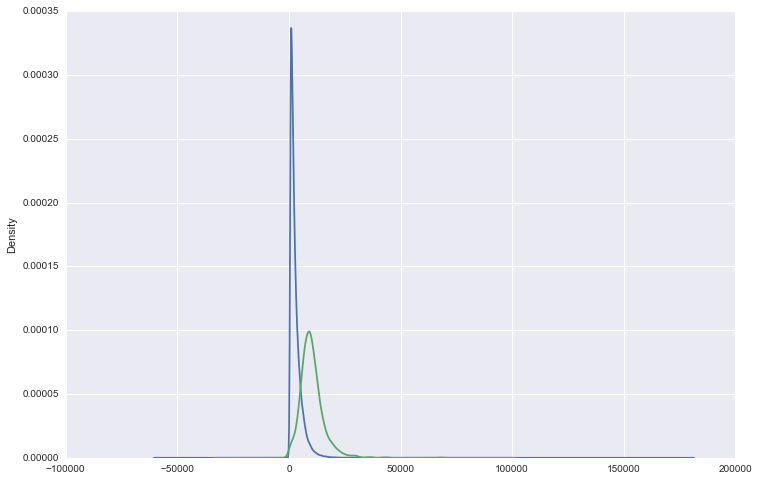

In [25]:
fg,ax = plt.subplots(nrows=1,ncols=1,sharey=True,sharex=True,figsize=(12, 8))
df[df.cat57=='A'].loss.plot(kind='kde')
df[df.cat57=='B'].loss.plot(kind='kde')

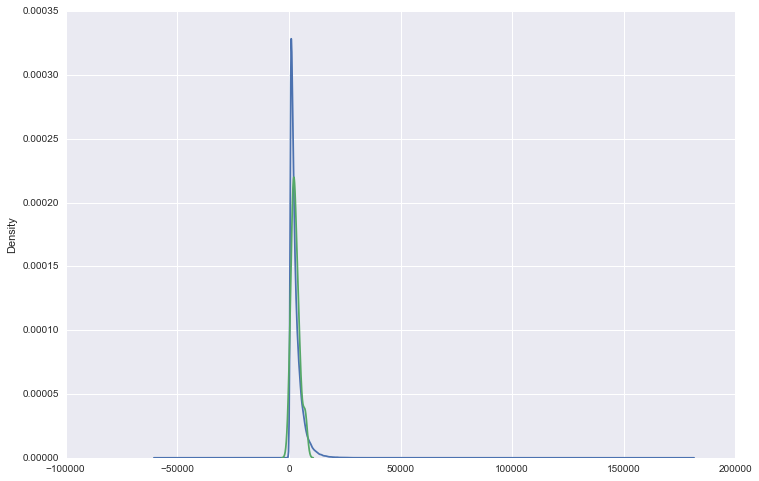

In [26]:
fg,ax = plt.subplots(nrows=1,ncols=1,sharey=True,sharex=True,figsize=(12, 8))
df[df.cat70=='A'].loss.plot(kind='kde')
df[df.cat70=='B'].loss.plot(kind='kde')

In [23]:
df[df.cat7=='B'].loss.mean()

8195.07852426762

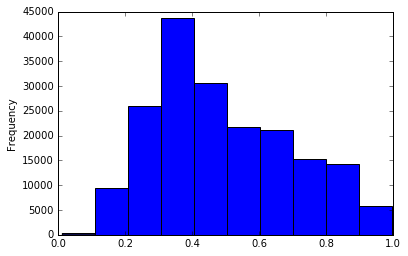

In [17]:
df['cont6'].plot(kind='hist')

In [10]:
X = df.iloc[:,117:-1]
y = df.iloc[:,-1]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
algo = RandomForestRegressor(random_state=42)
model = algo.fit(X_train,y_train)

In [13]:
score = model.score(X_test,y_test)
print score

-0.196175415587


In [14]:
feat_imps = model.feature_importances_
print feat_imps

[ 0.03074679  0.06292214  0.0307669   0.02936734  0.04999441  0.04624298
  0.10812435  0.03723576  0.02154786  0.02220951  0.03041032  0.0274944
  0.0348457   0.46809155]


In [ ]:
n_cols = 4
n_rows = 29
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(12, 8))
    for j in range(n_cols):
        sns.countplot(x=cols[i*n_cols+j], data=dataset, ax=ax[j])